In [1]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
import sys,pickle,glob
from tqdm import tqdm_notebook as tq
from IPython.display import display
from nltk.corpus import stopwords
from nltk.stem.snowball import EnglishStemmer
from collections import Counter
from IPython.core.display import display
#from pathos import multiprocessing as mp

from matplotlib import pyplot as plt
#import seaborn
#colors = seaborn.color_palette()
xr_full = range(1991,2016)
xr = range(1992,2016)
%matplotlib inline

In [5]:
all_cats = ['Environmental Sciences', 'Chemistry, Analytical', 'Oncology','Psychology, Developmental','Hospitality, Leisure, Sport & Tourism','Chemistry, Multidisciplinary', 'Astronomy & Astrophysics','Biotechnology & Applied Microbiology', 'Chemistry, Organic','Pharmacology & Pharmacy', 'Virology','Cardiac & Cardiovascular Systems', 'Ophthalmology','Marine & Freshwater Biology', 'Chemistry, Physical','Biochemistry & Molecular Biology', 'Clinical Neurology','Dermatology', 'Surgery', 'Physics, Multidisciplinary','Medical Laboratory Technology', 'Multidisciplinary Sciences','Nuclear Science & Technology', 'Medicine, General & Internal','Materials Science, Multidisciplinary', 'Engineering, Chemical','Computer Science, Information Systems', 'Mathematics','Medicine, Research & Experimental', 'Biodiversity Conservation','Urology & Nephrology', 'Dentistry, Oral Surgery & Medicine','Fisheries', 'Geochemistry & Geophysics', 'Physics, Mathematical','Veterinary Sciences', 'Physics, Atomic, Molecular & Chemical','Engineering, Environmental', 'Polymer Science', 'Plant Sciences','Chemistry, Inorganic & Nuclear', 'Engineering, Biomedical','Meteorology & Atmospheric Sciences', 'Endocrinology & Metabolism','Psychology, Multidisciplinary', 'Mathematics, Applied','Physics, Condensed Matter', 'Immunology', 'Cell Biology','Microbiology', 'Electrochemistry', 'Neurosciences', 'Acoustics','Public, Environmental & Occupational Health','Computer Science, Theory & Methods', 'Otorhinolaryngology','Genetics & Heredity', 'Physiology', 'Paleontology', 'Optics','Zoology', 'Agronomy', 'Psychology, Clinical', 'Mineralogy','Rehabilitation', 'Engineering, Mechanical','Statistics & Probability', 'Critical Care Medicine','Nutrition & Dietetics', 'Pathology', 'Ecology', 'Allergy','Biochemical Research Methods', 'Rheumatology','Metallurgy & Metallurgical Engineering', 'Physics, Applied','Economics', 'Crystallography', 'Materials Science, Ceramics','Psychology, Experimental', 'Pediatrics','Agricultural Engineering','Radiology, Nuclear Medicine & Medical Imaging','Gastroenterology & Hepatology', 'Education & Educational Research','Engineering, Aerospace', 'Physics, Particles & Fields','Behavioral Sciences', 'Agriculture, Multidisciplinary','Engineering, Electrical & Electronic','Peripheral Vascular Disease', 'Food Science & Technology','Mechanics', 'Anesthesiology', 'Engineering, Multidisciplinary','Business, Finance', 'Hematology', 'Computer Science, Cybernetics','Business', 'Computer Science, Interdisciplinary Applications','Infectious Diseases', 'Geography', 'Andrology','Instruments & Instrumentation', 'Psychology, Biological','Gerontology', 'Thermodynamics','Education, Scientific Disciplines', 'Entomology', 'Family Studies','Agriculture, Dairy & Animal Science', 'Developmental Biology','Psychology, Educational', 'Oceanography', 'Parasitology','Spectroscopy', 'Biophysics', 'Anatomy & Morphology','Chemistry, Applied', 'Computer Science, Software Engineering','Obstetrics & Gynecology', 'Nursing', 'Substance Abuse','Psychology', 'Mathematical & Computational Biology','Audiology & Speech-Language Pathology', 'Psychology, Social','Medicine, Legal', 'Geosciences, Multidisciplinary', 'Orthopedics','Political Science', 'Psychology, Applied', 'Biology', 'Psychiatry','Chemistry, Medicinal', 'Emergency Medicine', 'Horticulture','Forestry', 'Education, Special', 'Management','Reproductive Biology', 'Physics, Fluids & Plasmas','Physics, Nuclear', 'Ornithology', 'History', "Women's Studies",'Art', 'Computer Science, Hardware & Architecture','Social Sciences, Interdisciplinary','Agricultural Economics & Policy', 'Mycology','Operations Research & Management Science', 'Respiratory System','Soil Science', 'Remote Sensing', 'Ethics', 'Geology', 'Microscopy','Law', 'Automation & Control Systems', 'Psychology, Mathematical','Transplantation', 'Sociology', 'Geriatrics & Gerontology','Literature', 'Toxicology', 'Materials Science, Paper & Wood','Materials Science, Coatings & Films', 'Engineering, Civil','Health Care Sciences & Services','Information Science & Library Science','Materials Science, Composites', 'Sport Sciences','Construction & Building Technology', 'Linguistics', 'Anthropology','Tropical Medicine', 'Computer Science, Artificial Intelligence','Criminology & Penology', 'Demography', 'Geography, Physical','Nanoscience & Nanotechnology', 'Primary Health Care','Social Work', 'Engineering, Geological','Engineering, Manufacturing', 'Environmental Studies', 'Limnology','Communication', 'Health Policy & Services','Language & Linguistics', 'Planning & Development', 'Social Issues','Public Administration','Mathematics, Interdisciplinary Applications','History & Philosophy Of Science', 'Psychology, Psychoanalysis','Water Resources', 'Engineering, Industrial','Energy & Fuels','Materials Science, Characterization & Testing','Engineering, Ocean', 'Materials Science, Textiles', 'Archaeology','Imaging Science & Photographic Technology','Industrial Relations & Labor', 'Classics', 'Philosophy','Social Sciences, Mathematical Methods', 'Robotics', 'Music','Area Studies', 'Telecommunications', 'Engineering, Marine','Literature, American', 'Literature, German, Dutch, Scandinavian','Evolutionary Biology', 'International Relations', 'Ergonomics','Folklore', 'Humanities, Multidisciplinary','Literature, British Isles', 'Religion', 'Film, Radio, Television','Transportation', 'Integrative & Complementary Medicine','Medieval & Renaissance Studies', 'History Of Social Sciences','Literature, Slavic', 'Literature, Romance', 'Ethnic Studies','Architecture', 'Cultural Studies', 'Literary Theory & Criticism','Urban Studies', 'Materials Science, Biomaterials', 'Poetry','Literary Reviews', 'Asian Studies','Literature, African, Australian, Canadian', 'Theater', 'Logic','Mining & Mineral Processing', 'Cell & Tissue Engineering','Transportation Science & Technology', 'Engineering, Petroleum','Dance', 'Social Sciences, Biomedical', 'Medical Informatics','Medical Ethics', 'Neuroimaging']

In [3]:
DATADIR = '../results/'
#DATADIR = '/Users/jaredlorince/Desktop/'
# files = glob.glob(DATADIR+'by-cat-results/results*')
# cats = set([f[f.rfind('_')+1:] for f in files])
# print(sorted(cats))

In [4]:
cat_pubs_by_year = pd.read_pickle(DATADIR+'cat_pubs_by_year.pkl')
cat_citations_by_year = pd.read_pickle(DATADIR+'cat_citations_by_year.pkl')
cat_authors_by_year = pd.read_pickle(DATADIR+'cat_authors_by_year.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '../results/cat_pubs_by_year.pkl'

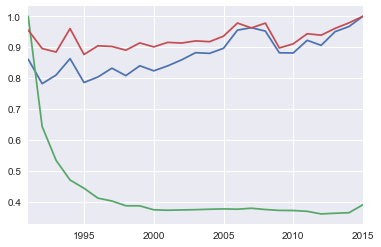

In [4]:
cat =  'Physics, Applied'
p = (cat_pubs_by_year[cat] / cat_pubs_by_year['ALL'])
(p/p.max()).plot()
c = (cat_citations_by_year[cat] / cat_citations_by_year['ALL'])
(c/c.max()).plot()
a = (cat_authors_by_year[cat] / cat_authors_by_year['ALL'])
(a/a.max()).plot()


In [5]:
props = cat_pubs_by_year.divide(cat_pubs_by_year['ALL'],axis=0)
growth = np.log10(props/props.shift(1))

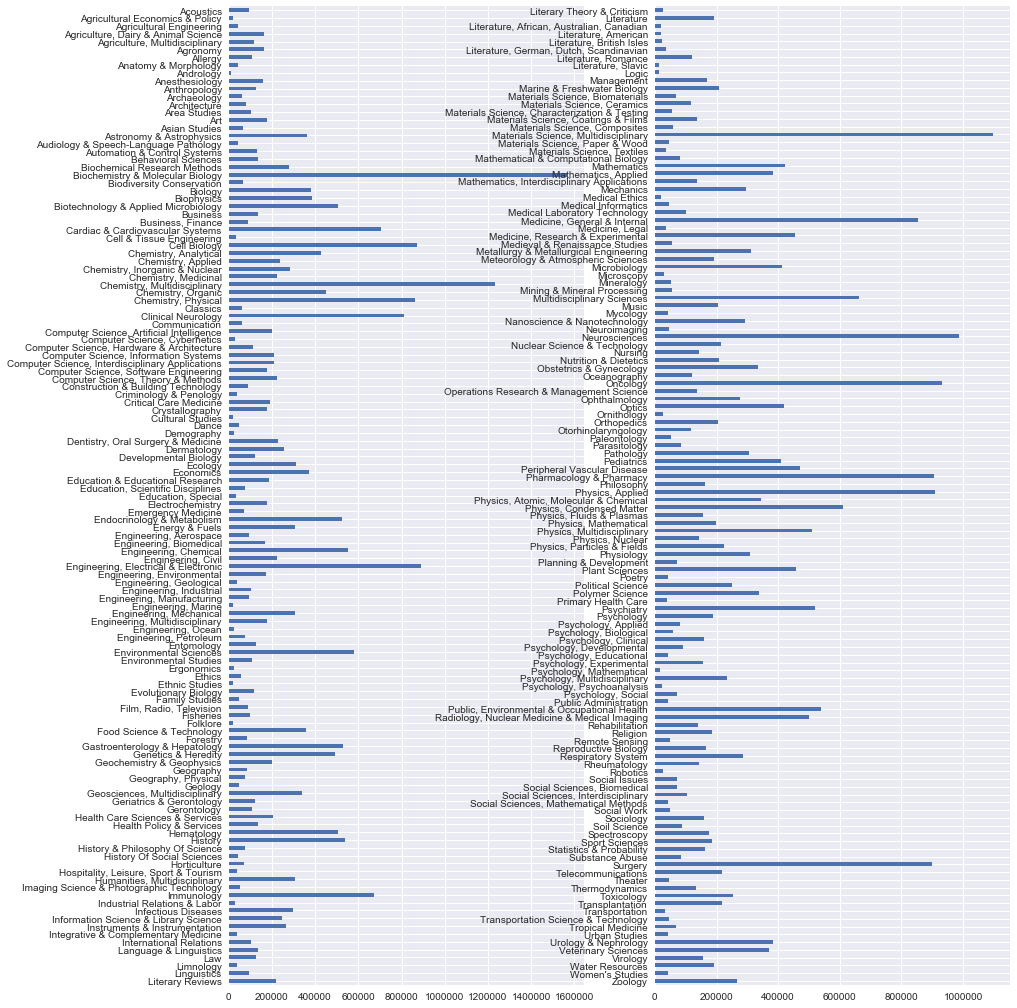

In [6]:
#just a big bar plot of the overall number of pubs for each field
fig,axes = plt.subplots(1,2,figsize=(14,18))
mx = cat_pubs_by_year.sum(0)[:-1].max()
cat_pubs_by_year.sum(0)[:125][::-1].plot(kind='barh',ax=axes[0],ylim=(0,mx))
cat_pubs_by_year.sum(0)[125:-1][::-1].plot(kind='barh',ax=axes[1],ylim=(0,mx));

In [7]:
def growth(cat,window):
    mx = len(cat_pubs_by_year)-(2*window-1)
    result = []
    for i in range(mx):
        a = cat_pubs_by_year[cat][i:i+window].sum()
        aprop = a/cat_pubs_by_year['ALL'][i:i+window].sum()
        b = cat_pubs_by_year[cat][i+window:i+window*2].sum()
        bprop = b/cat_pubs_by_year['ALL'][i+window:i+window*2].sum()
        result.append(np.log(bprop/aprop))    
    return np.array(result)

In [2]:
def parse_results(fi):
    df =  pd.read_table(fi,header=None,names=['measure','data'],index_col='measure')
    df.data = df.data.apply(lambda x: np.array(x.split(','),dtype=float))
    return df

In [3]:
colors = seaborn.color_palette()
def plotter(cat,window_size,mode='fixed'):
    #df = parse_results("{}by-cat-results/{}_null/results_{}_{}".format(DATADIR,mode,window_size,cat))
    df = parse_results("~/Desktop/results/results_{}_{}".format(window_size,cat))
    start = 1991+window_size-.5
    if mode == 'fixed':
        r = np.arange(start,start+len(df.ix['jsd_m'][0]))
        if window_size%2==0:
            r2 = np.arange(1991,1991+len(df.ix['ent_m'][0]))
        else:
            r2 = np.arange(start,start+len(df.ix['ent_m'][0]))

    else:
        r = np.arange(start,start+len(df.ix['jsds'][0]))
        if window_size%2==0:
            r2 = np.arange(1991,1991+len(df.ix['ents'][0]))
        else:
            r2 = np.arange(start,start+len(df.ix['ents'][0]))

    fig,axes = plt.subplots(1,4,figsize=(16,4))

    if mode == 'fixed':
        ax = axes[1]
        ax.plot(r2,df.ix['ent_m'][0],label='H')
        ax.fill_between(r2,df.ix['ent_m'][0]-df.ix['ent_c'][0],df.ix['ent_m'][0]+df.ix['ent_c'][0],alpha=.25)
        ax.set_title('Entropy')
        ax.legend(loc='lower right')

        ax = axes[3]
        ax.plot(r,df.ix['jsd_m'][0],label='JSD ',color=colors[0])
        ax.fill_between(r,df.ix['jsd_m'][0]-df.ix['jsd_c'][0],df.ix['jsd_m'][0]+df.ix['jsd_c'][0],alpha=.25)
        ax.plot(r,df.ix['ent_dif_m'][0],label=r'$\Delta H$ ',color=colors[1])
        ax.fill_between(r,df.ix['ent_dif_m'][0]-df.ix['ent_dif_c'][0],df.ix['ent_dif_m'][0]+df.ix['ent_dif_c'][0],alpha=.25,color=colors[1])
        ax.legend(loc='upper right')
        ax.set_xticks(np.arange(r[0]-.5,r[-1]+.5,5))    
        ax.set_title('Corrected measures')

    else:
        ax = axes[0]
        ax.plot(r,df.ix['jsds'][0],label='JSD (raw)',color=colors[0])
        ax.plot(r,df.ix['ent_difs'][0],label=r'$\Delta H$ (raw)',color=colors[1])
        ax.plot(r,df.ix['jsd-null_m'][0],label='JSD (null)',c=colors[0],ls='--')
        ax.plot(r,df.ix['entdif-null_m'][0],label=r'$\Delta H$ (null)',color=colors[1],ls='--')
        #ax.fill_between(r,df.ix['entropy-null_m'][0]+df.ix['entropy-null_c'][0],df.ix['entropy-null_m'][0]-df.ix['entropy-null_c'][0],color=colors[1],alpha=.25)
        ax.axhline(0,c='k',ls='--')
        ax.set_xticks(np.arange(r[0]-.5,r[-1]+.5,5))
        ax.legend(loc='lower right',fontsize='medium')
        ax.set_title('Change measures')

        ax = axes[1]
        ax.plot(r2,df.ix['ents'][0],label='H (raw)')
        if mode == 'global':
            ax.plot(r2,df.ix['entropy-null_m'][0],label='H (null)',color=colors[1])
            ax.fill_between(r2,df.ix['entropy-null_m'][0]+df.ix['entropy-null_c'][0],df.ix['entropy-null_m'][0]-df.ix['entropy-null_c'][0],color=colors[1],alpha=.25)
        ax.set_title('Entropy')
        ax.legend(loc='lower right')

        ax = axes[3]
        ax.plot(r,df.ix['jsds'][0]-df.ix['jsd-null_m'][0],label='JSD (corrected)',color=colors[0])
        ax.plot(r,df.ix['ent_difs'][0]-df.ix['entdif-null_m'][0],label=r'$\Delta H$ (corrected)',color=colors[1])
        ax.legend(loc='upper right')
        ax.set_xticks(np.arange(r[0]-.5,r[-1]+.5,5))    
        ax.set_title('Corrected measures')

    ax = axes[2]
    ax.plot(r,growth(cat,window_size),label='Growth')
    ax.axhline(0,c='k',ls='--')
    ax.set_xticks(np.arange(r[0]-.5,r[-1]+.5,5))
    ax.set_title('Growth')



    fig.suptitle("{} - {} year window".format(cat,window_size))
    

NameError: name 'seaborn' is not defined

In [31]:
#colors = seaborn.color_palette()
def plotter(cat,window_size):
    #df = parse_results("{}by-cat-results/{}_null/results_{}_{}".format(DATADIR,mode,window_size,cat))
    df = parse_results("~/Desktop/results/results_{}_{}".format(window_size,cat))
    start = 1991+window_size-.5
    r = np.arange(start,start+len(df.ix['jsd_m'][0]))
    if window_size%2==0:
        r2 = np.arange(1991,1991+len(df.ix['ent_m'][0]))
    else:
        r2 = np.arange(start,start+len(df.ix['ent_m'][0]))
    fig,axes = plt.subplots(1,3,figsize=(16,4))

    ax = axes[1]
    ax.plot(r2,df.ix['ent_m'][0],label='H')
    ax.fill_between(r2,df.ix['ent_m'][0]-df.ix['ent_c'][0],df.ix['ent_m'][0]+df.ix['ent_c'][0],alpha=.25)
    ax.set_title('Entropy')
    ax.legend(loc='lower right')

    ax = axes[2]
    ax.plot(r,df.ix['jsd_m'][0],label='JSD ',color=colors[0])
    ax.fill_between(r,df.ix['jsd_m'][0]-df.ix['jsd_c'][0],df.ix['jsd_m'][0]+df.ix['jsd_c'][0],alpha=.25)
    ax.plot(r,df.ix['ent_dif_m'][0],label=r'$\Delta H$ ',color=colors[1])
    ax.fill_between(r,df.ix['ent_dif_m'][0]-df.ix['ent_dif_c'][0],df.ix['ent_dif_m'][0]+df.ix['ent_dif_c'][0],alpha=.25,color=colors[1])
    ax.legend(loc='upper right')
    ax.set_xticks(np.arange(r[0]-.5,r[-1]+.5,5))    
    ax.set_title('Change measures')

    ax = axes[0]
    ax.plot(r,growth(cat,window_size),label='Growth')
    ax.axhline(0,c='k',ls='--')
    ax.set_xticks(np.arange(r[0]-.5,r[-1]+.5,5))
    ax.set_title('Growth')

    fig.suptitle("{} - {} year window".format(cat,window_size))
    
def ent_plotter(cat,window_size,ax):
    try:
        df = parse_results("~/Desktop/results/results_{}_{}".format(window_size,cat))
    except:
        return None
    start = 1991+window_size-.5
    r = np.arange(start,start+len(df.ix['jsd_m'][0]))
    if window_size%2==0:
        r2 = np.arange(1991,1991+len(df.ix['ent_m'][0]))
    else:
        r2 = np.arange(start,start+len(df.ix['ent_m'][0]))
    ax.plot(r2,df.ix['ent_m'][0],label=cat)
    ax.fill_between(r2,df.ix['ent_m'][0]-df.ix['ent_c'][0],df.ix['ent_m'][0]+df.ix['ent_c'][0],alpha=.25)
    xt = np.arange(r[0]-.5,r[-1]+.5,5)
    ax.set_xticks(xt)

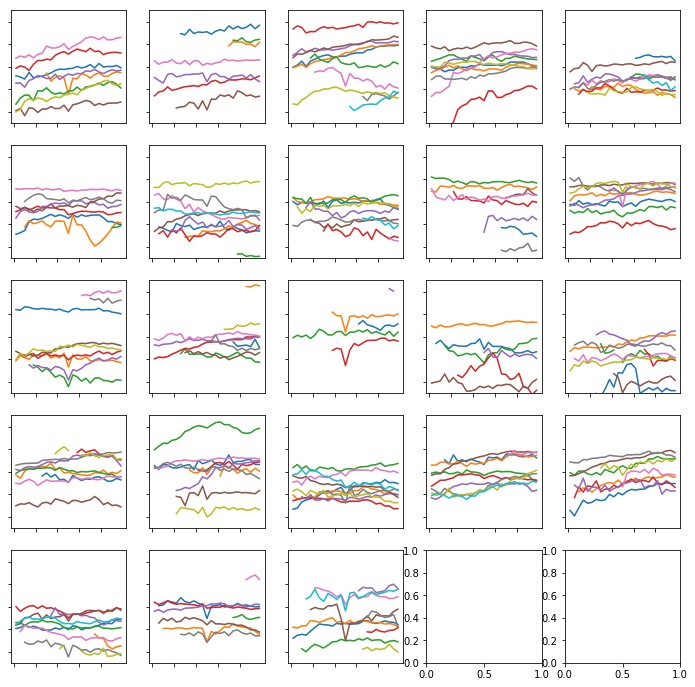

In [48]:
fig,axes = plt.subplots(5,5,figsize=(12,12))
axf = axes.ravel()
for i,ax in zip(np.arange(0,225,10),axf):
    for cat in sorted(all_cats)[i:i+10]:
        ent_plotter(cat,1,ax)
    ax.set_ylim(10.5,11.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

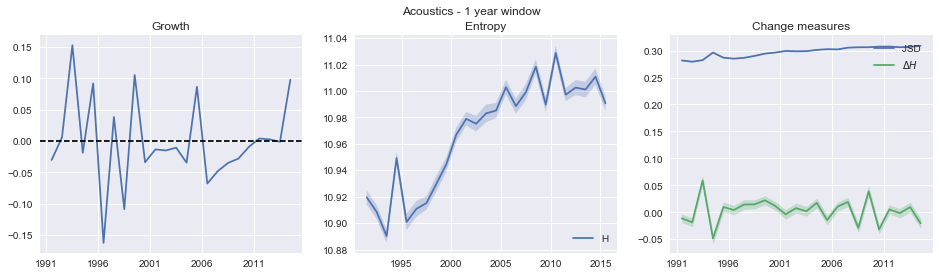

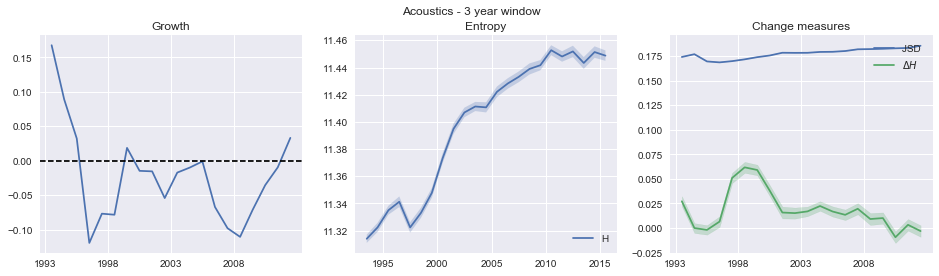

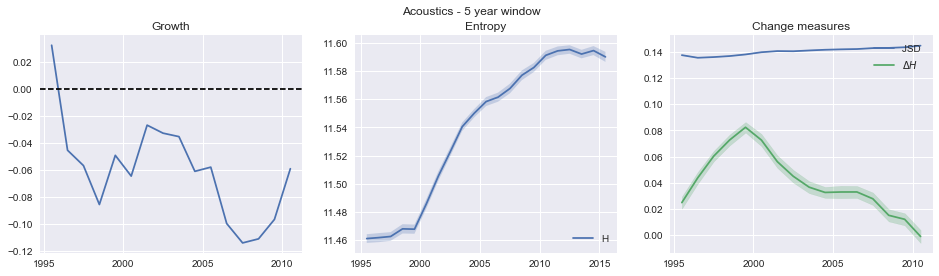

In [35]:
cat = 'Acoustics'
for win in (1,3,5):
    #plotter(cat,win,'local')
    plotter(cat,win)
#plotter(cat,win,'fixed')


In [27]:
ent_m = np.array([11.3544823358,11.3741821571,11.3912019033,11.4088411879,11.4235851207,11.4251969262,11.4273789044,11.4301594609,11.4283738167,11.4270117251,11.4304487987,11.4314593202,11.4349793221,11.4409663258,11.4467888116,11.447569328,11.4472383446,11.4456235071,11.4407666646,11.4367084557,11.4323948261])
ent_c =  np.array([0.000488824827895,0.000523603029594,0.000525541265933,0.000504400060889,0.000524845429205,0.000554782941266,0.000590986250294,0.000576179525601,0.000566265069805,0.000528343731186,0.00051291589206,0.000517298209184,0.000551640093075,0.000545686496846,0.000506481058794,0.000472420957657,0.000470152689945,0.000512894048743,0.000505029913478,0.000548591662094,0.000544974999379])
ent_dif_m = np.array([0.0707145904107,0.0531967472416,0.0389575576038,0.0195326287694,0.00342660441061,0.00525187246579,0.004080415818,0.00481986118802,0.012592509098,0.0197770864457,0.0171205293224,0.0157790243758,0.0106441850396,-0.000199661205747,-0.0100803559154,-0.0151745019219])
ent_dif_c = np.array([0.000732680075266,0.000770669669187,0.000771260061773,0.00074635915013,0.000709961586321,0.000755132812358,0.000817273466135,0.000847645720996,0.000826526126895,0.000728660426528,0.000651411766758,0.000651274426075,0.000759075975081,0.000752039912024,0.000784680428243,0.000775425146484])
jsd_m = np.array([0.0327522047362,0.0318061016103,0.0294736193936,0.0275682774265,0.0262456516035,0.0255018698355,0.0251763489252,0.0243728225154,0.0244824342651,0.0244115374192,0.0239800920795,0.023102397033,0.0224466102068,0.0219500577847,0.0215820460802,0.0214227817129])
jsd_c = np.array([4.40691320826e-05,4.31711856786e-05,4.35513154602e-05,4.16838288385e-05,3.82861520879e-05,4.37418943459e-05,4.72133694941e-05,3.75576301241e-05,3.92754764349e-05,4.09837970744e-05,3.96967127377e-05,3.89328613601e-05,3.32344892589e-05,3.88683085954e-05,3.66748086262e-05,3.58651167354e-05])

df_local = parse_results("{}by-cat-results/{}_null/results_{}_{}".format(DATADIR,'local',5,'Neurosciences'))
df_global = parse_results("{}by-cat-results/{}_null/results_{}_{}".format(DATADIR,'global',5,'Neurosciences'))

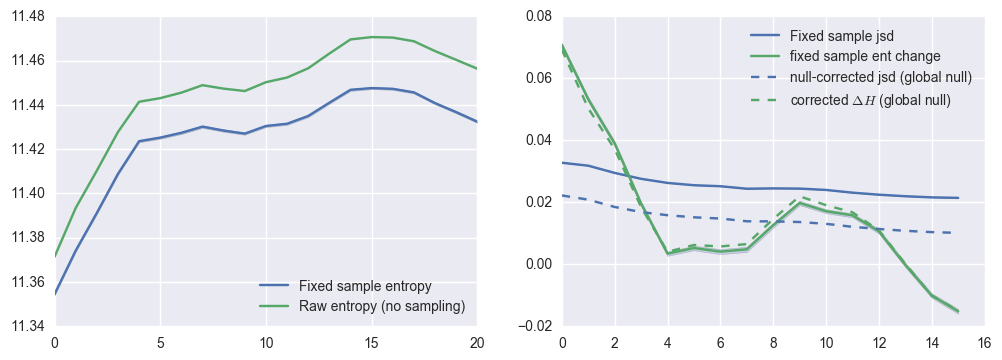

In [43]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
ax = axes[0]
ax.plot(ent_m,label='Fixed sample entropy')
ax.fill_between(range(len(ent_m)),ent_m-ent_c,ent_m+ent_c,alpha=.25)
ax.plot(df_global.ix['ents']['data'],label='Raw entropy (no sampling)')
ax.legend(loc='lower right')
ax = axes[1]
ax.plot(jsd_m,label='Fixed sample jsd')
ax.fill_between(range(len(jsd_m)),jsd_m-jsd_c,jsd_m+jsd_c,alpha=.25)
ax.plot(ent_dif_m,label='fixed sample ent change')
ax.fill_between(range(len(ent_dif_m)),ent_dif_m-ent_dif_c,ent_dif_m+ent_dif_c,alpha=.25)
ax.plot(df_global.ix['jsds'][0]-df_global.ix['jsd-null_m'][0],label='null-corrected jsd (global null)',color=colors[0],ls='--')
#ax.plot(df_local.ix['jsds'][0]-df_local.ix['jsd-null_m'][0],label='null-corrected jsd (local null)',color=colors[0],ls='--')
ax.plot(df_global.ix['ent_difs'][0]-df_global.ix['entdif-null_m'][0],label=r'corrected $\Delta H$ (global null)',color=colors[1],ls='--')
#ax.plot(df_local.ix['ent_difs'][0]-df_local.ix['entdif-null_m'][0],label=r'corrected $\Delta H$ (global null)',color=colors[1],ls='-',lw=.5)

ax.legend()

In [24]:
df_global

,data
measure,
ents,"[11.2935021922, 11.3041780128, 11.3047106979, ..."
ent_difs,"[0.0106758206411, 0.000532685076811, 0.0189275..."
jsds,"[0.0218432274225, 0.0216242247396, 0.023442963..."
entropy-null_m,"[11.4736046936, 11.4762918362, 11.4775776191, ..."
entropy-null_c,"[0.000402575078975, 0.00042374488511, 0.000392..."
entdif-null_m,"[0.00268714263071, 0.00128578282943, 0.0027204..."
entdif-null_c,"[0.000563943003046, 0.000592850199706, 0.00056..."
jsd-null_m,"[0.0159214447273, 0.0152496489151, 0.014464729..."
jsd-null_c,"[1.47810220753e-05, 1.39152363935e-05, 1.15661..."


In [14]:
df_local

,data
measure,
ents,"[11.2935021922, 11.3041780128, 11.3047106979, ..."
ent_difs,"[0.0106758206411, 0.000532685076811, 0.0189275..."
jsds,"[0.0218432274225, 0.0216242247396, 0.023442963..."
entdif-null_m,"[0.00114243120832, 0.00111919936972, 0.0017730..."
entdif-null_c,"[0.000533989545755, 0.000579123987826, 0.00055..."
jsd-null_m,"[0.0104151076744, 0.010010433051, 0.0097667458..."
jsd-null_c,"[1.46022370797e-05, 1.11939231353e-05, 1.71707..."


In [87]:

pd.Series(np.random.zipf(2,500)).value_counts().add(pd.Series(np.random.zipf(2,500)).value_counts(),fill_value=0)

1       611.0
2       156.0
3        69.0
4        37.0
5        16.0
6        18.0
7        12.0
8        11.0
9         8.0
10        7.0
11        6.0
12        3.0
13        5.0
14        6.0
15        2.0
16        4.0
17        2.0
18        2.0
19        3.0
20        1.0
21        1.0
25        1.0
28        1.0
29        1.0
30        1.0
34        1.0
40        1.0
46        1.0
47        2.0
52        1.0
54        1.0
59        1.0
61        1.0
63        1.0
92        1.0
105       1.0
112       1.0
123       1.0
147       1.0
1178      1.0
dtype: float64

In [152]:
def sampler(orig_docs,sample_size):
    docs = []
    # generate `orig_docs` from a zipf distribution
    for _ in range(orig_docs):
        # this just creates a freq distribution of words for each doc
        docs.append(pd.Series(np.random.zipf(2,500)).value_counts())
    # now sample a number `sample_size` from these docs
    sample = np.random.choice(docs,sample_size,replace=False)
    # now put the sampled docs together and generate the overall word distribution
    concat = pd.concat(docs)
    result = concat.groupby(concat.index).sum()
    return result / result.sum()

In [153]:
from tqdm import tqdm_notebook as tq
def jsd(p,q):
    return entropy((p+q)/2.,base=2) - 0.5*entropy(p,base=2) - 0.5*entropy(q,base=2)
h1 = []
h2 = []
for _ in tq(range(2000)):
    dist1 = sampler(1000,500)
    dist2 = sampler(2000,500)
    h1.append(entropy(dist1,base=2))
    h2.append(entropy(dist2,base=2))


KeyboardInterrupt: 

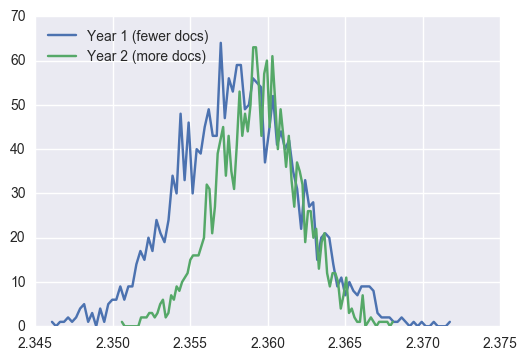

In [138]:
fig,ax = plt.subplots(1,1)
vals,bins = np.histogram(h1,bins=100)
ax.plot(bins[:-1],vals,label='Year 1 (fewer docs)')
vals,bins = np.histogram(h2,bins=100)
ax.plot(bins[:-1],vals,label='Year 2 (more docs)')
ax.legend(loc='upper left')

In [139]:
from scipy.stats import ks_2samp
ks_2samp(h1,h2)

Ks_2sampResult(statistic=0.19549999999999998, pvalue=6.9755790583782831e-34)

In [157]:
from tqdm import tqdm_notebook as tq
def jsd(p,q):
    return entropy((p+q)/2.,base=2) - 0.5*entropy(p,base=2) - 0.5*entropy(q,base=2)
h1 = []
h2 = []
for _ in tq(range(1000)):
    dist1 = sampler(500,250)
    dist2 = sampler(1000,250)
    h1.append(entropy(dist1,base=2))
    h2.append(entropy(dist2,base=2))


KeyboardInterrupt: 

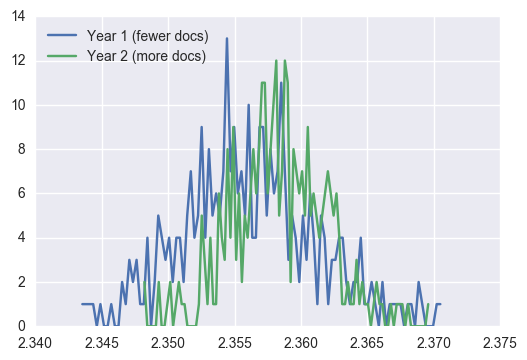

In [158]:
fig,ax = plt.subplots(1,1)
vals,bins = np.histogram(h1,bins=100)
ax.plot(bins[:-1],vals,label='Year 1 (fewer docs)')
vals,bins = np.histogram(h2,bins=100)
ax.plot(bins[:-1],vals,label='Year 2 (more docs)')
ax.legend(loc='upper left')

In [159]:
ks_2samp(h1,h2)

Ks_2sampResult(statistic=0.27492447129909364, pvalue=1.6503214806228301e-11)

In [151]:
np.random.choice?